In [1]:

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:

plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('ggplot')


data = pd.read_csv("C:/Users/ASUS/Desktop/Trabalho_SIG/US/us-states-connecticut.csv", encoding='utf-8', skiprows=[1])


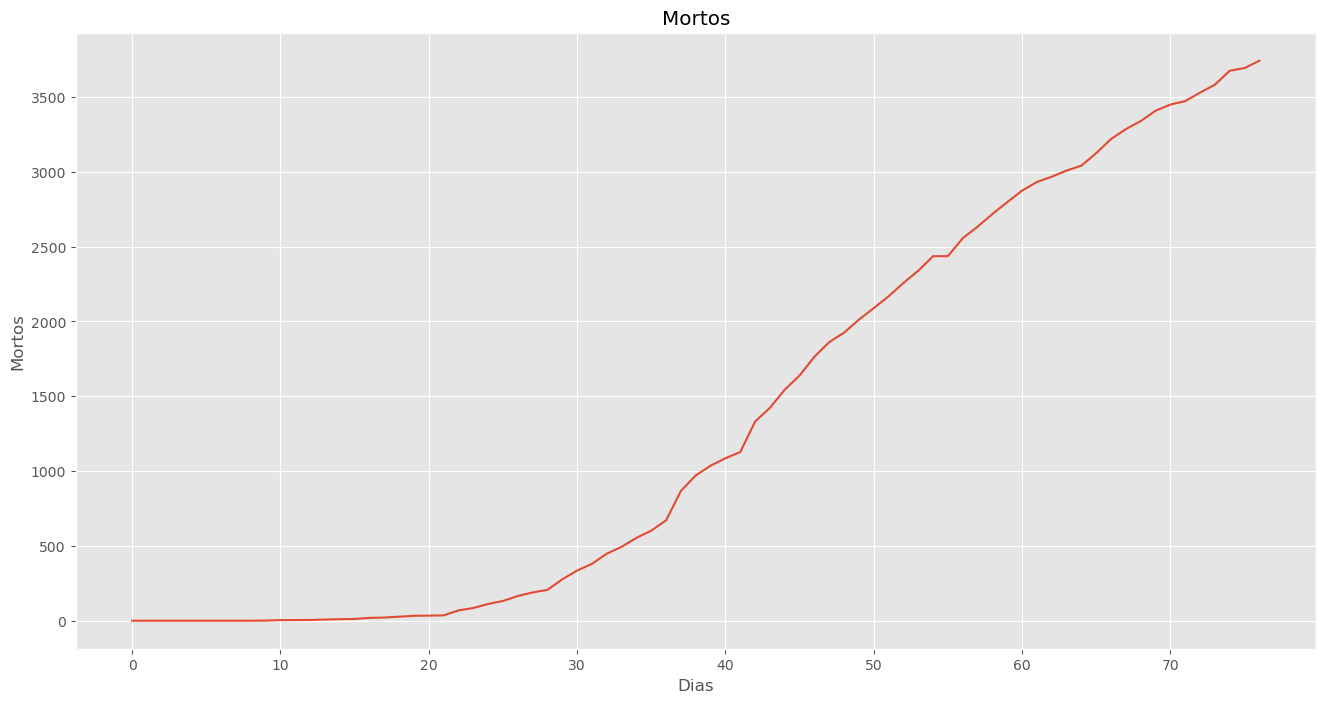

In [3]:
plt.figure(figsize=(16,8))
plt.title('Mortos')
plt.xlabel('Dias')
plt.ylabel('Mortos')
plt.plot(data['deaths'])
plt.show()

In [4]:
data = data[['deaths']]
data.head(4)

,deaths
0,0
1,0
2,0
3,0


In [5]:
future_days = 35
data['Prediction'] = data[['deaths']].shift(-future_days)
data.tail(4)

,deaths,Prediction
73,3582,NaN
74,3675,NaN
75,3693,NaN
76,3742,NaN


In [6]:
x= np.array(data.drop(['Prediction'], 1))[:-future_days]
print(x)

[[   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   4]
 [   4]
 [   5]
 [   8]
 [  10]
 [  12]
 [  19]
 [  21]
 [  27]
 [  33]
 [  34]
 [  36]
 [  69]
 [  85]
 [ 112]
 [ 132]
 [ 165]
 [ 189]
 [ 206]
 [ 277]
 [ 335]
 [ 380]
 [ 448]
 [ 494]
 [ 554]
 [ 602]
 [ 671]
 [ 868]
 [ 971]
 [1036]
 [1086]
 [1127]]


In [7]:
y = np.array(data['Prediction'])[:-future_days]
print(y)

[ 602.  671.  868.  971. 1036. 1086. 1127. 1331. 1423. 1544. 1639. 1764.
 1862. 1925. 2012. 2089. 2168. 2257. 2339. 2436. 2436. 2556. 2633. 2718.
 2797. 2874. 2932. 2967. 3008. 3041. 3125. 3219. 3285. 3339. 3408. 3449.
 3472. 3529. 3582. 3675. 3693. 3742.]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [9]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train, y_train)

In [10]:
x_future = data.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[   0],
       [   0],
       [   1],
       [   4],
       [   4],
       [   5],
       [   8],
       [  10],
       [  12],
       [  19],
       [  21],
       [  27],
       [  33],
       [  34],
       [  36],
       [  69],
       [  85],
       [ 112],
       [ 132],
       [ 165],
       [ 189],
       [ 206],
       [ 277],
       [ 335],
       [ 380],
       [ 448],
       [ 494],
       [ 554],
       [ 602],
       [ 671],
       [ 868],
       [ 971],
       [1036],
       [1086],
       [1127]], dtype=int64)

In [11]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[ 943.66666667  943.66666667 1544.         1639.         1639.
 1862.         1925.         2012.         2012.         2168.
 2257.         2257.         2436.         2436.         2556.
 2718.         2718.         2797.         2874.         2932.
 2967.         2967.         3041.         3125.         3219.
 3285.         3339.         3408.         3449.         3472.
 3529.         3582.         3693.         3693.         3693.        ]

[1874.47225279 1874.47225279 1876.78773969 1883.73420039 1883.73420039
 1886.04968729 1892.99614799 1897.6271218  1902.2580956  1918.4665039
 1923.0974777  1936.99039911 1950.88332051 1953.19880741 1957.82978121
 2034.24084894 2071.28863935 2133.80678567 2180.11652368 2256.5275914
 2312.09927702 2351.46255433 2515.86212428 2650.16036452 2754.35727505
 2911.8103843  3018.32278173 3157.25199578 3268.39536701 3428.16396316
 3884.31488259 4122.81003337 4273.31668191 4389.09102695 4484.02598987]


C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


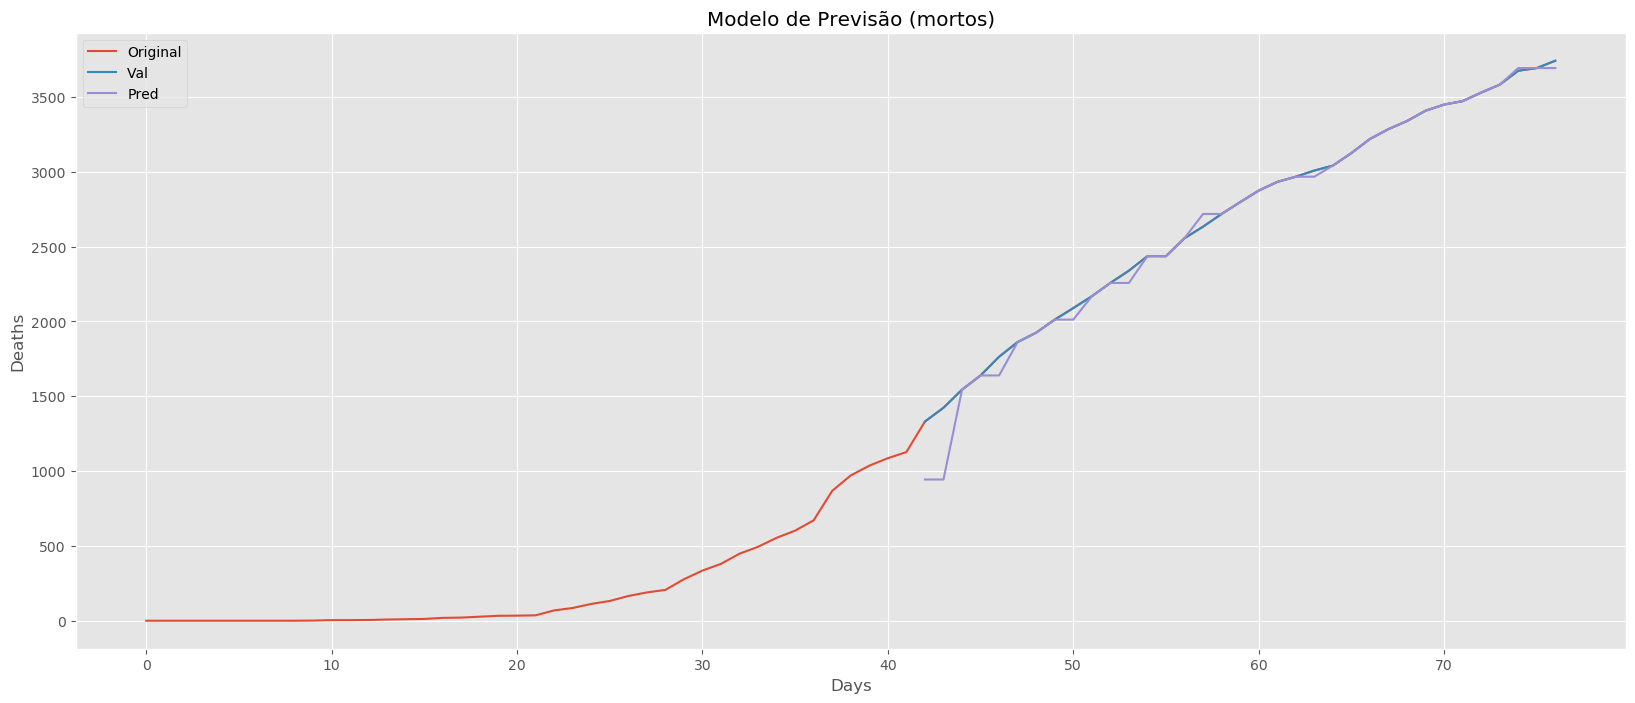

In [15]:
predictions = tree_prediction
valid = data[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Modelo de Previsão (mortos)')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.plot(data['deaths'])
plt.plot(valid[['deaths', 'Predictions']])
plt.legend(['Original', 'Val', 'Pred'])
plt.savefig('Figuras/previsaomortos.jpg', bbox_inches='tight')
plt.show()
